In [6]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wrangled_data.csv')
df.describe()

,square_footage,number_occupants,appliances_used,average_temperature,is_weekend,energy_consumption
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,25500.527273,48.268182,25.730000,22.559745,0.499091,4168.191273
std,14236.955632,29.127624,14.116209,7.122357,0.500227,924.278723
min,560.000000,1.000000,1.000000,10.050000,0.000000,1683.950000
25%,13203.750000,22.000000,13.000000,16.365000,0.000000,3510.460000
50%,25785.500000,47.000000,26.000000,22.810000,0.000000,4189.690000
75%,37536.750000,73.000000,38.000000,28.760000,1.000000,4859.510000
max,49997.000000,99.000000,49.000000,34.990000,1.000000,6530.600000


In [3]:
df.building_type.describe()

count            1100
unique              3
top       residential
freq              387
Name: building_type, dtype: object

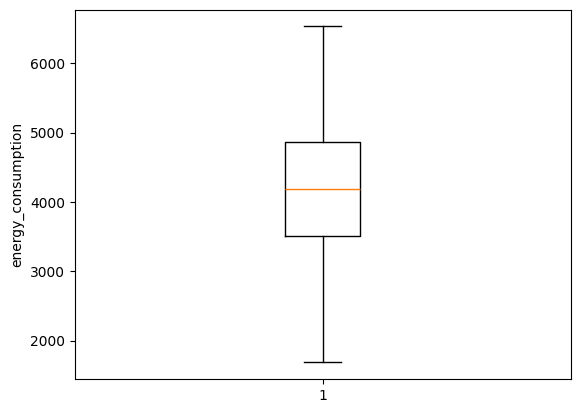

In [4]:
plt.boxplot(df.energy_consumption)
plt.ylabel('energy_consumption')
plt.show()

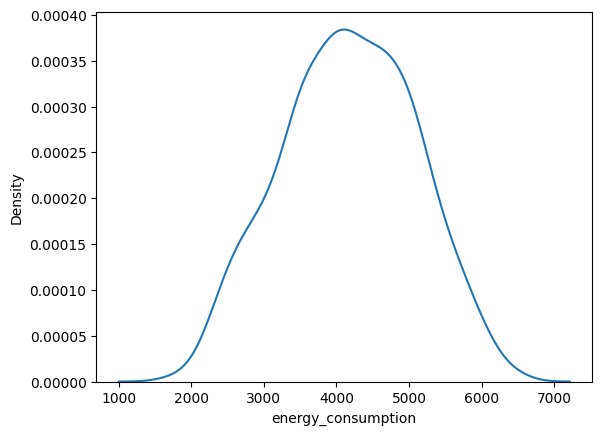

In [5]:
sns.kdeplot(df.energy_consumption)
plt.show()

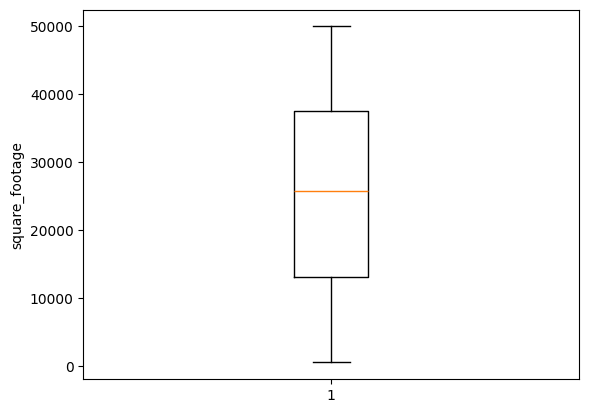

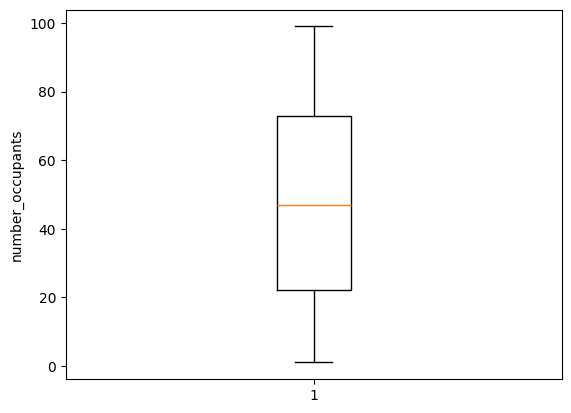

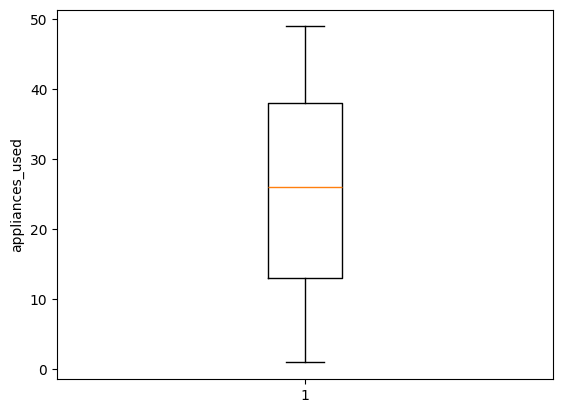

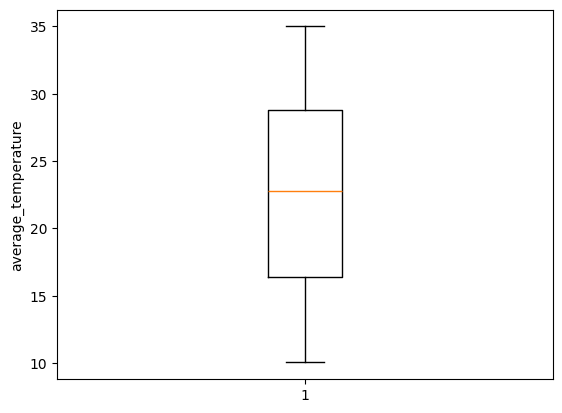

In [10]:
for var in df.drop(['building_type', 'is_weekend', 'energy_consumption'], axis=1).columns.to_list():
    plt.boxplot(df[[var]])
    plt.ylabel(var)
    plt.show()

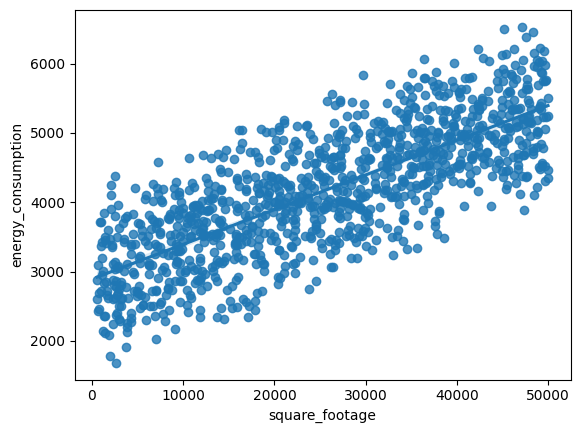

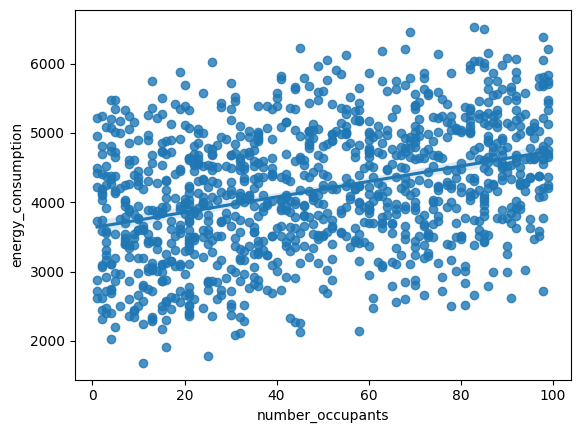

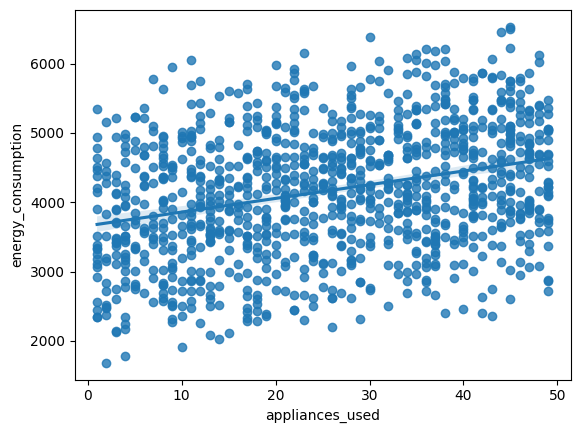

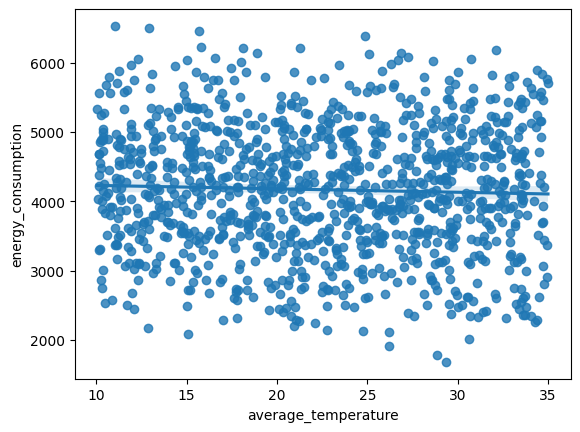

In [11]:
for var in df.drop(['building_type', 'is_weekend', 'energy_consumption'], axis=1).columns.to_list():
    sns.regplot(df, x=var, y='energy_consumption')
    plt.xlabel(var)
    plt.ylabel('energy_consumption')
    plt.show()

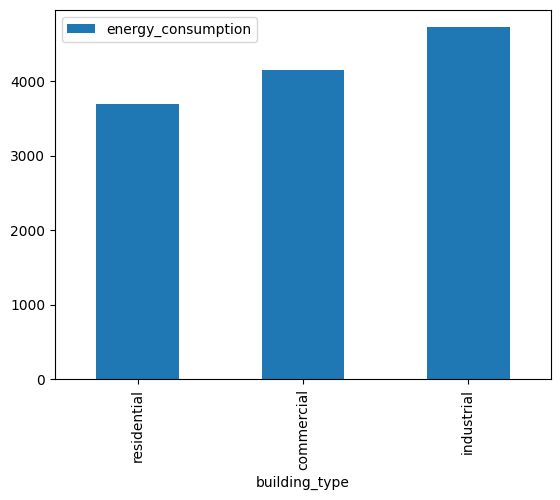

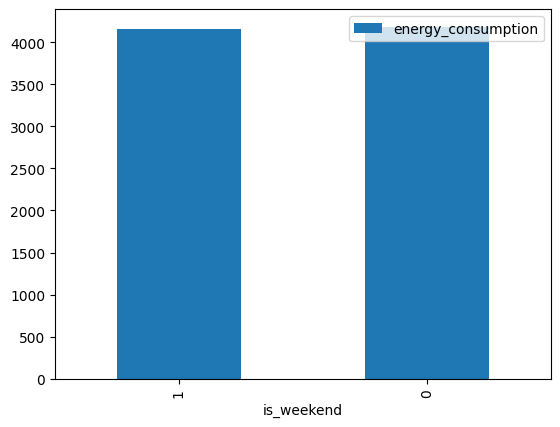

In [12]:
for var in['building_type', 'is_weekend']:
    df[[var, 'energy_consumption']].groupby(var).mean().sort_values(by = 'energy_consumption').plot(kind = 'bar')
    plt.show()

In [15]:
f_list = []
p_list = []

for var in df.drop('energy_consumption', axis=1).columns.to_list():
    formula = 'energy_consumption~' + var
    model = ols(formula, df).fit()
    f_list.append(sm.stats.anova_lm(model).iloc[0,3])
    p_list.append(sm.stats.anova_lm(model).iloc[0,4])

f_test_df = pd.DataFrame({'variable':df.drop('energy_consumption', axis=1).columns.to_list(), 'F_score': f_list, 'p': p_list})
f_test_df['significance'] = (f_test_df.p <= 0.05).astype(int)
f_test_df

,variable,F_score,p,significance
0,building_type,144.471068,2.023711e-56,1
1,square_footage,1606.953016,3.383328e-217,1
2,number_occupants,153.561511,4.205076e-33,1
3,appliances_used,109.794574,1.495790e-24,1
4,average_temperature,1.605122,2.054476e-01,0
5,is_weekend,0.335752,5.624102e-01,0


In [17]:
building_type_dummy = pd.get_dummies(df[['building_type']]).astype(int)
analyzed_df = pd.concat([building_type_dummy, df.drop('building_type', axis=1)], axis=1)
analyzed_df.head(10)

,building_type_commercial,building_type_industrial,building_type_residential,square_footage,number_occupants,appliances_used,average_temperature,is_weekend,energy_consumption
0,0,0,1,7063,76,10,29.84,0,2713.95
1,1,0,0,44372,66,45,16.72,0,5744.99
2,0,1,0,19255,37,17,14.30,1,4101.24
3,0,0,1,13265,14,41,32.82,0,3009.14
4,1,0,0,13375,26,18,11.92,0,3279.17
5,1,0,0,37377,26,32,16.24,1,4687.67
6,0,1,0,38638,92,14,21.01,1,5526.83
7,0,0,1,34950,60,18,28.24,0,4116.32
8,0,1,0,29741,99,44,13.08,0,5841.65
9,0,0,1,17467,42,36,28.84,0,3419.13


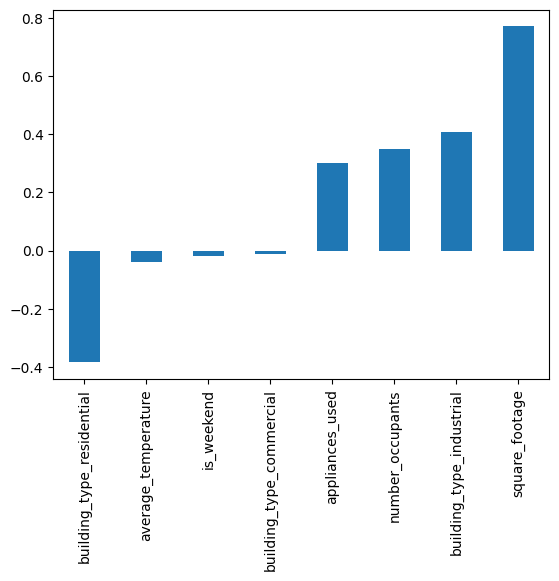

In [18]:
analyzed_df.corr()['energy_consumption'].drop('energy_consumption').sort_values().plot(kind = 'bar')
plt.show()

In [23]:
var_list = analyzed_df.drop('energy_consumption', axis=1).columns.to_list()
r_list = []
p_list = []

for var in var_list:
    r_list.append(pearsonr(analyzed_df[var], analyzed_df.energy_consumption)[0])
    p_list.append(pearsonr(analyzed_df[var], analyzed_df.energy_consumption)[1])

r_test_df = pd.DataFrame({'variable': var_list, 'r': r_list, 'p': p_list})
r_test_df['significance'] = (r_test_df.p <= 0.05).astype(int)
r_test_df

,variable,r,p,significance
0,building_type_commercial,-0.011709,6.980691e-01,0
1,building_type_industrial,0.406179,6.054609e-45,1
2,building_type_residential,-0.384949,3.574194e-40,1
3,square_footage,0.770765,3.383328e-217,1
4,number_occupants,0.350280,4.205076e-33,1
5,appliances_used,0.301505,1.495790e-24,1
6,average_temperature,-0.038206,2.054476e-01,0
7,is_weekend,-0.017484,5.624102e-01,0


In [24]:
field_list = list(r_test_df[r_test_df.significance == 1]['variable'])
field_list.append('energy_consumption')
analyzed_df = analyzed_df[field_list]
analyzed_df.head()

,building_type_industrial,building_type_residential,square_footage,number_occupants,appliances_used,energy_consumption
0,0,1,7063,76,10,2713.95
1,0,0,44372,66,45,5744.99
2,1,0,19255,37,17,4101.24
3,0,1,13265,14,41,3009.14
4,0,0,13375,26,18,3279.17


In [25]:
analyzed_df.to_csv('analyzed_data.csv', index = False)